In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import kagglehub

In [2]:
path = kagglehub.dataset_download("erdemtaha/cancer-data")

print("Path to dataset files:", path)

100%|██████████| 48.6k/48.6k [00:00<00:00, 56.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/erdemtaha/cancer-data/versions/1


In [3]:
dataset = pd.read_csv('/content/Cancer_Data.csv')
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# prompt: define X and y componnet form dataset

X = dataset.drop('diagnosis', axis=1)
y = dataset['diagnosis']


In [5]:
from sklearn.impute import SimpleImputer

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [7]:
imputer = SimpleImputer(strategy='mean')  # Create an imputer instance
X_train = imputer.fit_transform(X_train)  # Fit and transform on training data
X_test = imputer.transform(X_test)      # Transform test data using the trained imputer

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [8]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
predictions = logistic.predict(X_test)

In [10]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           B       0.90      0.99      0.94       109
           M       0.98      0.81      0.88        62

    accuracy                           0.92       171
   macro avg       0.94      0.90      0.91       171
weighted avg       0.93      0.92      0.92       171



In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

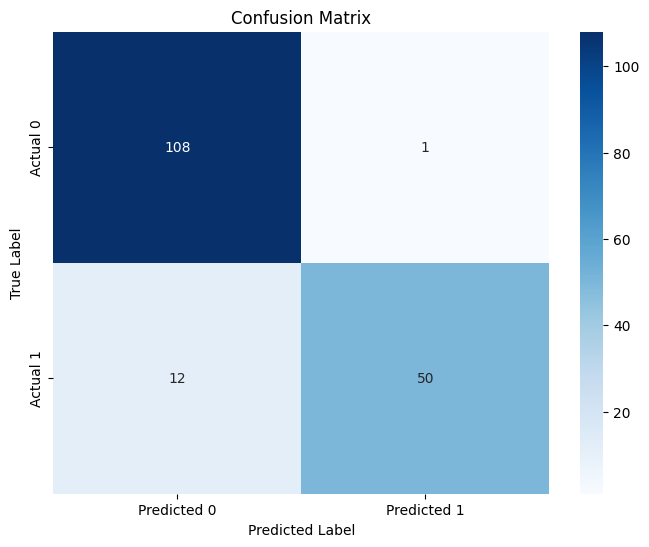

In [12]:
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [13]:
# prompt: how to calculate the gradient decesnt

import numpy as np

def gradient_descent(X, y, learning_rate=0.01, iterations=1000):
    """
    Performs gradient descent to find the optimal coefficients for a linear regression model.

    Args:
        X: The feature matrix (NumPy array).
        y: The target variable (NumPy array).
        learning_rate: The learning rate for gradient descent.
        iterations: The number of iterations to perform.

    Returns:
        A tuple containing:
            - coefficients: The optimal coefficients found by gradient descent.
            - cost_history: A list of the cost function values at each iteration.
    """
    y = pd.to_numeric(y, errors='coerce')

    m = len(y)  # Number of samples
    n = X.shape[1]  # Number of features
    coefficients = np.zeros(n)  # Initialize coefficients to zero
    cost_history = []

    for _ in range(iterations):
        y_predicted = np.dot(X, coefficients)
        error = y_predicted - y
        gradient = (1 / m) * np.dot(X.T, error)
        coefficients -= learning_rate * gradient
        cost = (1 / (2 * m)) * np.sum(error ** 2)
        cost_history.append(cost)
    return coefficients, cost_history


# Convert pandas DataFrame to NumPy arrays if necessary
X_numpy = X.to_numpy()
y_numpy = y.to_numpy()

# Add a column of 1s to X for the intercept term
X_numpy = np.concatenate((np.ones((X_numpy.shape[0], 1)), X_numpy), axis=1)


coefficients, cost_history = gradient_descent(X_numpy, y_numpy)

print("Coefficients:", coefficients)
print("Cost History:", cost_history)


Coefficients: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
Cost History: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, n